# Objective

Hi! Welcome to my first Kernel.
Here, I will be using the dataset "Countries of the World". The data comes from 227 countries and contains information about some of the important factors that govern economic development.  In this, I will be doing exploratory data analysis and try to make a predictive model for GDP per capita, as this is the key indicator of economic development of any country. Also, I will check some other ingredients of Economic development and the relationships between them. 

### Importing the necessary modules and loading the data:

In [3]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
countries=pd.read_csv('countries of the world.csv', decimal=',')

### Checking the data:

We begin our analysis with some exploratory data analysis. We first check the columns, the shape of the distribution and about their statistics. To get a glimpse of how the data looks like, one can use the `head` and `tail` methods.

In [4]:
print(countries.columns)

Index([u'Country', u'Region', u'Population', u'Area (sq. mi.)',
       u'Pop. Density (per sq. mi.)', u'Coastline (coast/area ratio)',
       u'Net migration', u'Infant mortality (per 1000 births)',
       u'GDP ($ per capita)', u'Literacy (%)', u'Phones (per 1000)',
       u'Arable (%)', u'Crops (%)', u'Other (%)', u'Climate', u'Birthrate',
       u'Deathrate', u'Agriculture', u'Industry', u'Service'],
      dtype='object')


In [5]:
print(countries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

Checking the statistics can give key insights about the distribution of various variables. This also helps in deciding which imputation method to use while dealing with missing data (this is discussed later in this kernel).

In [6]:
print(countries.describe())

         Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
count  2.270000e+02    2.270000e+02                  227.000000   
mean   2.874028e+07    5.982270e+05                  379.047137   
std    1.178913e+08    1.790282e+06                 1660.185825   
min    7.026000e+03    2.000000e+00                    0.000000   
25%    4.376240e+05    4.647500e+03                   29.150000   
50%    4.786994e+06    8.660000e+04                   78.800000   
75%    1.749777e+07    4.418110e+05                  190.150000   
max    1.313974e+09    1.707520e+07                16271.500000   

       Coastline (coast/area ratio)  Net migration  \
count                    227.000000     224.000000   
mean                      21.165330       0.038125   
std                       72.286863       4.889269   
min                        0.000000     -20.990000   
25%                        0.100000      -0.927500   
50%                        0.730000       0.000000   
75%               

Next, we quickly check how many rows for each feature has a null entry (this is just an easier way to get the sum of rows with missing data for a variable compared to the `info()` method).

In [7]:
print(countries.isnull().sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


If you are curious about the missing data for a particular column feature., this example shows one way to do that.

In [8]:
print(countries[countries['Net migration'].isnull()])

                Country                               Region  Population  \
47        Cook Islands   OCEANIA                                   21388   
221  Wallis and Futuna   OCEANIA                                   16025   
223     Western Sahara   NORTHERN AFRICA                          273008   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
47              240                        89.1                         50.00   
221             274                        58.5                         47.08   
223          266000                         1.0                          0.42   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
47             NaN                                 NaN              5000.0   
221            NaN                                 NaN              3700.0   
223            NaN                                 NaN                 NaN   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (

Machine learning models in Python do not entertain categorical data which means if we put these variables in our model then it will give an error.  Thus it is essential to check the data types before proceeding further, as shown here.  If the dtype is an object, it needs to be encoded. One of the ways to encode them is by using One Hot encoding where we will use Pandas `get_dummies` function.  As for the current data we have only two categorical variables: Country and Region. We will get back to this point when we start building our model.

In [9]:
print(countries.dtypes)

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object


For further analysis, I am keen which regions are there and the number of countries that fall into them, their population and their total area.  To do such operations we use `groupby` function which helps in segregating the data into groups and then one can apply any function to either selected columns or to all.  Here, I first grouped the data by 'Region' then counted the number of countries as well as the total population and area that fall under each region.

In [10]:
countries_grouped= countries.groupby('Region')[['Country','Population','Area (sq. mi.)']].agg({'Country':'count', 'Population':'sum','Area (sq. mi.)':'sum'})
print(countries_grouped)

                                     Country  Area (sq. mi.)  Population
Region                                                                  
ASIA (EX. NEAR EAST)                      28        23096712  3687982236
BALTICS                                    3          175015     7184974
C.W. OF IND. STATES                       12        22100843   280081548
EASTERN EUROPE                            12         1152222   119914717
LATIN AMER. & CARIB                       45        20544084   561824599
NEAR EAST                                 16         4355586   195068377
NORTHERN AFRICA                            6         6018890   161407133
NORTHERN AMERICA                           5        21782471   331672307
OCEANIA                                   21         8519812    33131662
SUB-SAHARAN AFRICA                        51        24341406   749437000
WESTERN EUROPE                            28         3710478   396339998


In case you are curious about the region specific distribution of the countries and their details about the various features, you can find it here. To obtain data in that format I created a multi-index using `set_index` method as shown here. Here, I am only showing a few rows using `head` method.

In [11]:
countries_indexed= countries.set_index(['Region','Country']).sort_index()
print(countries_indexed.head(3))

                                            Population  Area (sq. mi.)  \
Region                        Country                                    
ASIA (EX. NEAR EAST)          Afghanistan     31056997          647500   
                              Bangladesh     147365352          144000   
                              Bhutan           2279723           47000   

                                            Pop. Density (per sq. mi.)  \
Region                        Country                                    
ASIA (EX. NEAR EAST)          Afghanistan                         48.0   
                              Bangladesh                        1023.4   
                              Bhutan                              48.5   

                                            Coastline (coast/area ratio)  \
Region                        Country                                      
ASIA (EX. NEAR EAST)          Afghanistan                            0.0   
                              

### Dealing with the missing data:
As seen above, we have 14 columns out of 20 that have missing entries. If we drop all these missing entries (as shown next), we lose 21% of out data.

In [12]:
countries_dropped=countries.dropna()
print(countries_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
Country                               179 non-null object
Region                                179 non-null object
Population                            179 non-null int64
Area (sq. mi.)                        179 non-null int64
Pop. Density (per sq. mi.)            179 non-null float64
Coastline (coast/area ratio)          179 non-null float64
Net migration                         179 non-null float64
Infant mortality (per 1000 births)    179 non-null float64
GDP ($ per capita)                    179 non-null float64
Literacy (%)                          179 non-null float64
Phones (per 1000)                     179 non-null float64
Arable (%)                            179 non-null float64
Crops (%)                             179 non-null float64
Other (%)                             179 non-null float64
Climate                               179 non-null float64
Birthrate       

In order to avoid loss of 21% of data, we fill the missing values in all 'NaN' containing columns. As median is a better statistical parameter here than mean because of some skewness of data in variables, we fill the missing values with the median of each region obtained for each variable.  Only in the case of  'Climate' column which has categorical data, the missing data is filled by the mode of that specific region. Dealing with missing values is a crucial step in any data analysis. Therefore, before deciding which parameter to use to fill the missing value, the distribution of the data should be carefully observed. Then we can check that we have filled all the missing values by using `isnull().sum()` function on dataframe (as done before).

In [13]:
countries['Climate'] = countries.groupby('Region')['Climate'].transform(lambda x: x.fillna(x.mode().max()))

In [14]:
lst=['Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Birthrate','Deathrate','Agriculture','Industry','Service']
for col in countries.columns:
    if countries[col].isnull().sum()!=0:
        if col in lst:
            countries[col] = countries.groupby('Region')[col].transform(lambda x: x.fillna(x.median()))

In [15]:
print(countries.isnull().sum())

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


### Plotting and analysing the data:

After fixing all the missing values, it is time to check plots and see if we can find any interesting correlation between these variables. Here, we are using matplotlib and seaborn libraries for plotting. As can be observed from the heatmap below, GDP(% per capita) is showing a strong negative correlation with Infant mortality (per 1000 births), Birthrate and Agriculture. Also, it is showing a very strong positive correlation with Phones (per 1000) and a moderate positive correlation with Literacy(%) and Service. Moreover, it has some weak positive correlation with Net migration.  Additionally, Literacy(%) is showing strong negative correlation with Infant mortality (per 1000 births), Birthrate and Agriculture. In addition to GDP(% per capita), Literacy(%) is showing moderate positive correlation with Phones (per 1000), Service. Also, we find that agriculture is strongly positively correlated with Infant mortality (per 1000 births) and Birthrate, while it is negatively correlated with Service and Phone (per 1000) and as indicated before with  GDP(% per capita), Literacy(%).

In [19]:
countries['Region']

0            ASIA (EX. NEAR EAST)         
1      EASTERN EUROPE                     
2      NORTHERN AFRICA                    
3      OCEANIA                            
4      WESTERN EUROPE                     
5      SUB-SAHARAN AFRICA                 
6                  LATIN AMER. & CARIB    
7                  LATIN AMER. & CARIB    
8                  LATIN AMER. & CARIB    
9                     C.W. OF IND. STATES 
10                 LATIN AMER. & CARIB    
11     OCEANIA                            
12     WESTERN EUROPE                     
13                    C.W. OF IND. STATES 
14                 LATIN AMER. & CARIB    
15     NEAR EAST                          
16           ASIA (EX. NEAR EAST)         
17                 LATIN AMER. & CARIB    
18                    C.W. OF IND. STATES 
19     WESTERN EUROPE                     
20                 LATIN AMER. & CARIB    
21     SUB-SAHARAN AFRICA                 
22     NORTHERN AMERICA                   
23         

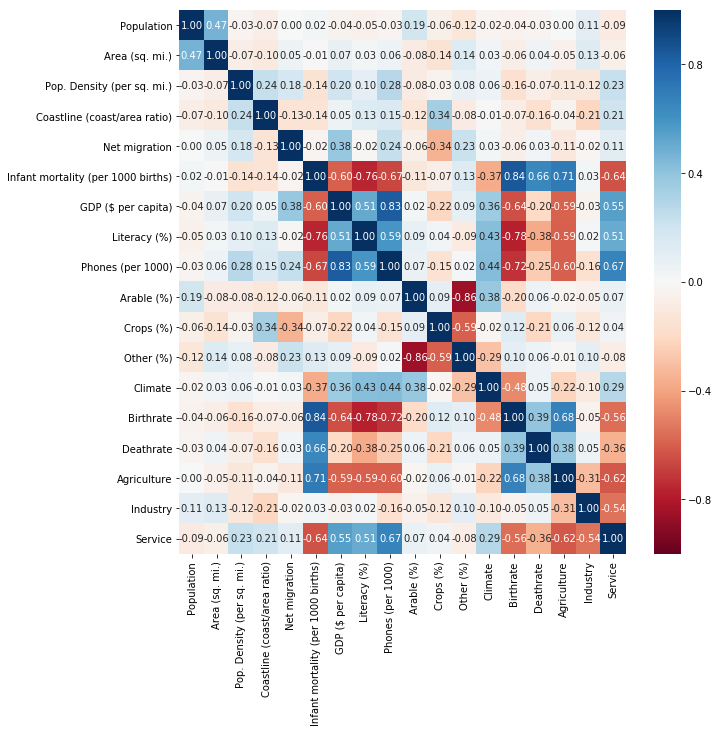

In [27]:
colormap = plt.cm.RdBu
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(countries.corr(), annot=True, vmin=-1, vmax=1,fmt = ".2f", cmap = colormap, ax=ax)
plt.show()

One of the ways to visualize the correlation between various variables is by seaborn's pairplot. We try to see correlation between GDP(% per capita) and other factors that were showing positive or negative correlation with it. But, while doing that we can also observe the correlation among other factors as well. The diagonal subplots in pairplots are showing the region specific distribution of the variables.

/Users/siddhant/miniconda/envs/deepData/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


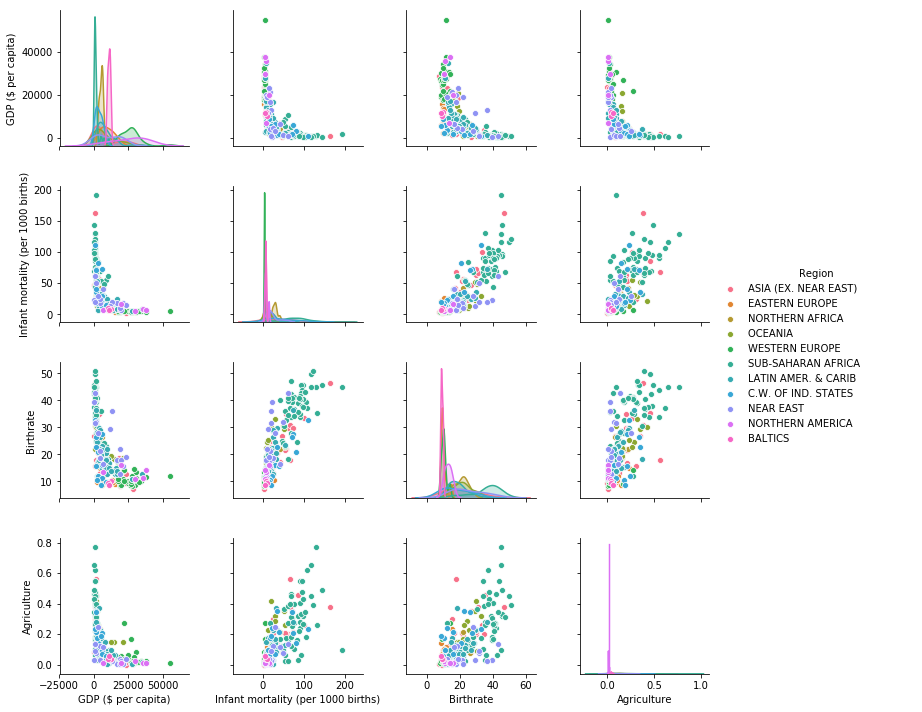

In [28]:
sns.pairplot(countries, vars= ['GDP ($ per capita)','Infant mortality (per 1000 births)', 'Birthrate','Agriculture'],hue='Region')

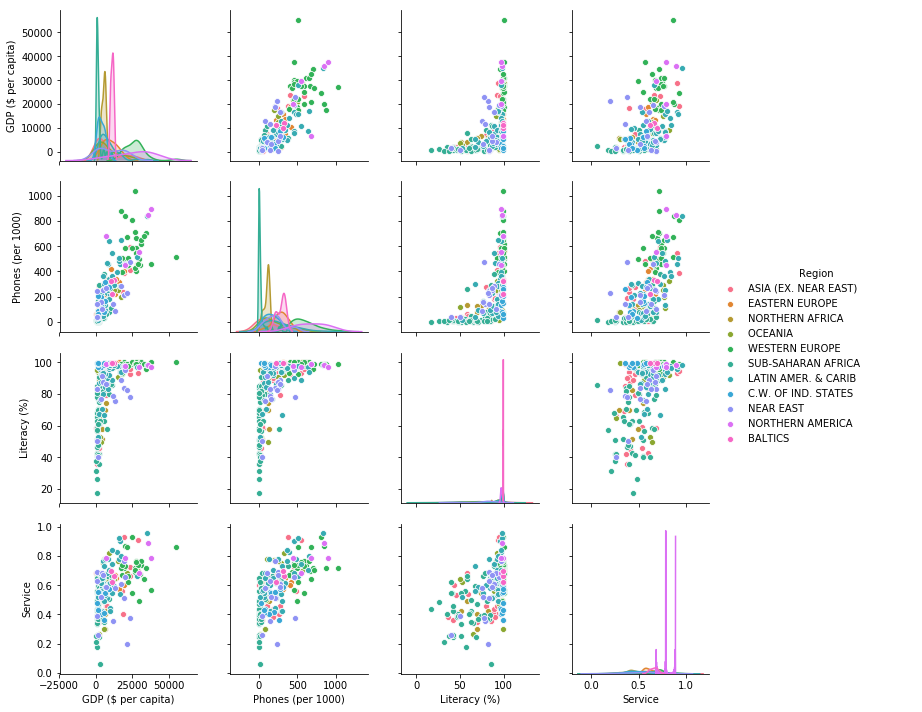

In [29]:
sns.pairplot(countries, vars= ['GDP ($ per capita)','Phones (per 1000)', 'Literacy (%)','Service'],hue='Region')

An interesting observation (but well-known and obvious) can be made from the following two bar graphs below: GDP (\$ per capita) for various regions and the population distribution of these regions. Sadly, some populated regions have low GDP (\$ per capita).

AxesSubplot(0.125,0.125;0.775x0.755)


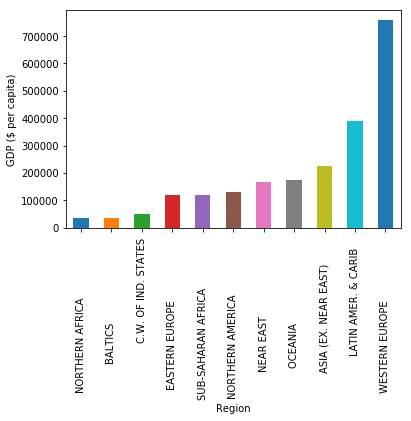

In [30]:
print(countries.groupby('Region')['GDP ($ per capita)'].sum().sort_values().plot(kind='bar'))
plt.ylabel('GDP ($ per capita)')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


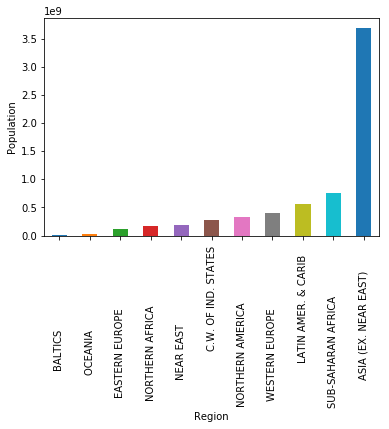

In [31]:
print(countries.groupby('Region')['Population'].sum().sort_values().plot(kind='bar'))
plt.ylabel('Population')
plt.show()

### Building a model for predicting GDP (per capita):
As we have already observed from the pairplots that GDP ($ per capita) is showing non linear relationship with most of the variables, therefore, we move straight to play with Random Forest and  XGBoost for building a predictive model.  
But, before we start building our model we have to get rid of categorical data that has `dtype` 'object', as machine learning models give errors with categorical data. We will encode them using get_dummies function. Here, we encode the 'Region' column of the dataframe. By encoding we create individual column for each value of the 'Region' column. After that we delete the 'Region' column from the new dataframe that we made after encoding. Moreover, we also drop 'Countries' column which is 'object' dtype and we do not need it further. 

In [ ]:
countries= pd.concat([countries,pd.get_dummies(countries['Region'], prefix='region')], axis=1).drop(['Region'],axis=1)
print(countries.head())
print(countries.dtypes)
print(countries.shape)

Here, we first try Random Forest. For that we import the necessary modules and then fit and predict the model.  For checking the model's quality we are using Root Mean Square Error (RMSE). 

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree
from xgboost import plot_importance
import numpy as np
from sklearn.ensemble import RandomForestRegressor

y = countries['GDP ($ per capita)']
X = countries.drop(['GDP ($ per capita)','Country'], axis=1)

forest_model = RandomForestRegressor(random_state=21)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
forest_model.fit(train_X, train_y)
forest_predictions = forest_model.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, forest_predictions))
print("RMSE: %f" % (rmse))


Now, we try XGBoost and compare the RMSE from both the models.  As expected the RMSE reduces for XGBoost.

In [ ]:
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))


Now, using XGBoost's plot_importance function, we find the important features. 

In [ ]:
plot_importance(model_x)


Now, we take the top 12 important features and use XGBoost for model prediction. The difference seen in RMSE obtained using 12 features versus the one obtained using 30 features (as shown above) is not that substantial. This suggest that these 12 features are the key players.

In [ ]:
y = countries['GDP ($ per capita)']
X = countries[['Population','Agriculture','Net migration','Infant mortality (per 1000 births)','Birthrate','Coastline (coast/area ratio)','Crops (%)','Industry','Service','Arable (%)','Deathrate','Area (sq. mi.)']]
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))

### Conclusion 
In this analysis we found the key features governing GDP (% per capita) and made a predictive model using XGBoost.  
Thanks for reading. Any feedback is highly appreciated.


In [23]:
import numpy as np

In [24]:
df = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'), index=pd.date_range('2012-01-01', periods=10)); 

In [27]:
df.dtypes

A    float64
B    float64
C    float64
dtype: object